### Projeto para análise
Para esse conjunto de exercícios vamos utilizar o conjunto de dados disponibilizado em: Global Energy Consumption Dataset extraindo e analisando dados de países da América do Sul. O objetivo é que explorem os dados de consumo de energia, identifiquem padrões e façam comparações entre diferentes fontes de energia.

Utilizando o conteúdos de nossas aulas, bem como, as biblioteca que já utilizamos até o momento, implemente funções que realizem as seguintes tarefas:

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Carregar o dataset completo
file_path = 'World_Energy_Consumption.csv'  # Atualize o caminho se necessário
energy_data = pd.read_csv(file_path)

# Listar países da América do Sul
paises_america_do_sul = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", 
    "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"
]

# Filtrar para países da América do Sul
dados_america_do_sul = energy_data[energy_data['country'].isin(paises_america_do_sul)]

# Selecionar colunas relevantes
colunas_energia_relevantes = [
    "country", "year", "electricity_demand", "electricity_generation",
    "renewables_consumption", "hydro_consumption", "solar_consumption", "wind_consumption",
    "fossil_fuel_consumption", "coal_consumption", "gas_consumption", "oil_consumption"
]

# Filtrar os dados com as colunas relevantes
dados_energia_america_sul = dados_america_do_sul[colunas_energia_relevantes]

### Exploração Inicial:
<ol>
    <li>Identificar os países da América do Sul no dataset.</li>
</ol>

<ul>
    <li>Filtrar os dados para incluir apenas esses países.</li>
    <li>Exibir um resumo estatístico das variáveis relacionadas ao consumo de energia (como consumo de eletricidade, consumo de fontes renováveis, etc.).</li>
</ul>

In [6]:
# Resumo estatístico das variáveis
resumo_estatistico = dados_energia_america_sul.describe()
print("Resumo estatístico das variáveis de energia:")
print(resumo_estatistico)

# Maior e menor consumo total de energia
consumo_total_paises = dados_energia_america_sul.groupby("country")["electricity_demand"].sum()
maior_consumo = consumo_total_paises.idxmax(), consumo_total_paises.max()
menor_consumo = consumo_total_paises.idxmin(), consumo_total_paises.min()
print(f"\nMaior consumo total de energia: País = {maior_consumo[0]}, Consumo = {maior_consumo[1]:.2f} TWh")
print(f"Menor consumo total de energia: País = {menor_consumo[0]}, Consumo = {menor_consumo[1]:.2f} TWh")

Resumo estatístico das variáveis de energia:
              year  electricity_demand  electricity_generation  \
count  1233.000000          272.000000              378.000000   
mean   1965.036496           82.524081               77.927886   
std      35.931159          147.335448              123.779690   
min    1900.000000            0.650000                0.650000   
25%    1934.000000            7.992500               10.925000   
50%    1968.000000           27.235000               44.475000   
75%    1997.000000           83.197500               77.677500   
max    2022.000000          703.980000              680.880000   

       renewables_consumption  hydro_consumption  solar_consumption  \
count              406.000000         406.000000         252.000000   
mean               171.373833         145.266229           1.414040   
std                328.284558         252.521416           6.960145   
min                  0.736000           0.736000           0.000000   
25%  

### Análise por Tipo de Energia:

<ol>
    <li>Para cada país da América do Sul, analisar o consumo de energia elétrica (ou outra fonte de interesse) ao longo dos anos.</li>
    <li>Criar um gráfico de linhas mostrando o consumo de energia ao longo dos anos para cada país da América do Sul.</li>
    <li>Identificar os países com o maior e menor consumo total de energia ao longo dos anos.</li>
</ol>

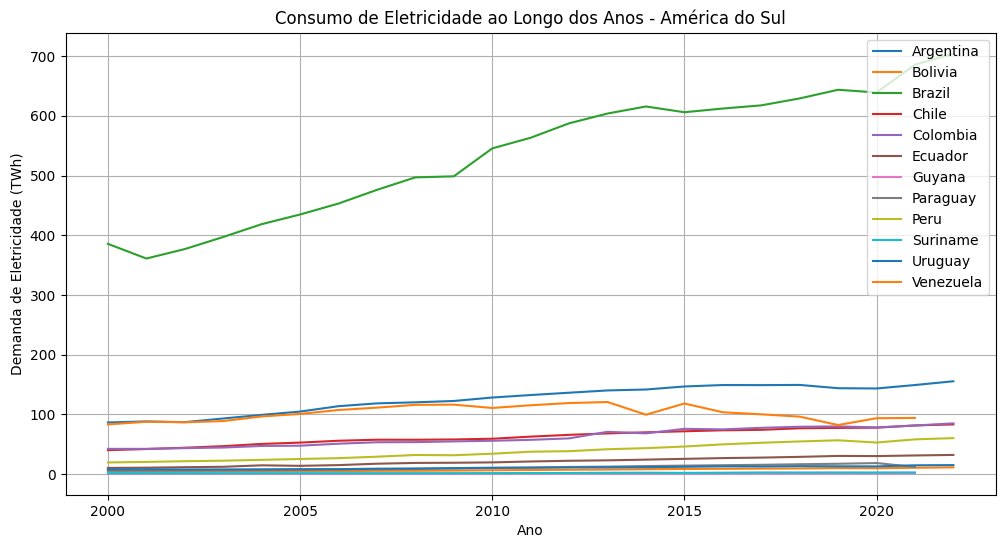

In [7]:
# Gráfico de consumo de eletricidade ao longo dos anos por país
plt.figure(figsize=(12, 6))
for pais in paises_america_do_sul:
    dados_pais = dados_energia_america_sul[dados_energia_america_sul['country'] == pais]
    plt.plot(dados_pais["year"], dados_pais["electricity_demand"], label=pais)
plt.title("Consumo de Eletricidade ao Longo dos Anos - América do Sul")
plt.xlabel("Ano")
plt.ylabel("Demanda de Eletricidade (TWh)")
plt.legend()
plt.grid(True)
plt.show()

### Comparação de Fontes de Energia Renováveis vs. Não Renováveis

<ol>
    <li>Comparar o uso de fontes de energia renováveis (hidrelétrica, solar, eólica) com o uso de fontes não renováveis (fóssil, gás natural) para cada país da América do Sul.</li>
    <li>Agrupar os dados por tipo de fonte de energia (renovável vs. não renovável).</li>
    <li>Calcular a média e o desvio padrão do consumo de cada tipo de energia por país.</li>
    <li>Criar um gráfico de barras que mostre a proporção de uso de energia renovável em comparação com a energia não renovável para cada país da América do Sul.</li>
</ol>

C:\Users\Yuki\AppData\Local\Temp\ipykernel_13400\3844212097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_energia_america_sul["renovavel"] = dados_energia_america_sul[
C:\Users\Yuki\AppData\Local\Temp\ipykernel_13400\3844212097.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_energia_america_sul["nao_renovavel"] = dados_energia_america_sul[


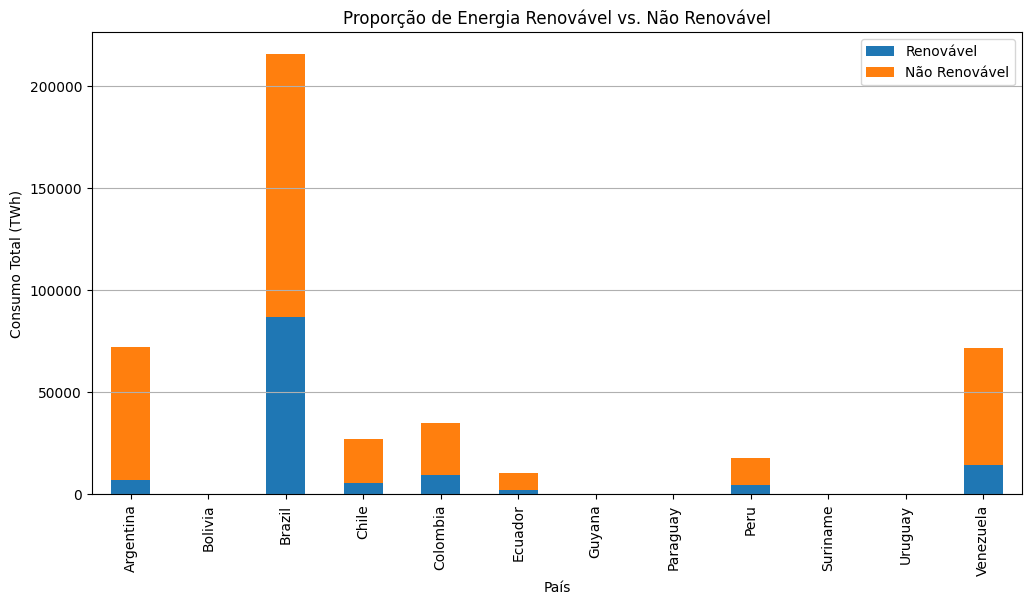

In [8]:
# Comparação de renováveis vs. não renováveis
dados_energia_america_sul["renovavel"] = dados_energia_america_sul[
    ["renewables_consumption", "hydro_consumption", "solar_consumption", "wind_consumption"]
].sum(axis=1, skipna=True)
dados_energia_america_sul["nao_renovavel"] = dados_energia_america_sul[
    ["fossil_fuel_consumption", "coal_consumption", "gas_consumption", "oil_consumption"]
].sum(axis=1, skipna=True)

dados_agrupados = dados_energia_america_sul.groupby("country")[["renovavel", "nao_renovavel"]].sum()

# Gráfico de barras para renováveis vs. não renováveis
dados_agrupados.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Proporção de Energia Renovável vs. Não Renovável")
plt.xlabel("País")
plt.ylabel("Consumo Total (TWh)")
plt.legend(["Renovável", "Não Renovável"])
plt.grid(axis="y")
plt.show()

### Análise Temporal e Tendências
<ol>
    <li>Tendência de Crescimento no Consumo de Energia:</li>
</ol>

<ul>
    <li>Analisar se há uma tendência de aumento no consumo de energia nos países da América do Sul ao longo dos últimos anos.</li>
    <li>Criar um gráfico de linha mostrando o crescimento do consumo de energia ao longo das décadas (por exemplo, 1990 a 2020).</li>
    <li>Identificar os países que tiveram o maior crescimento percentual no consumo de energia.</li>
</ul>

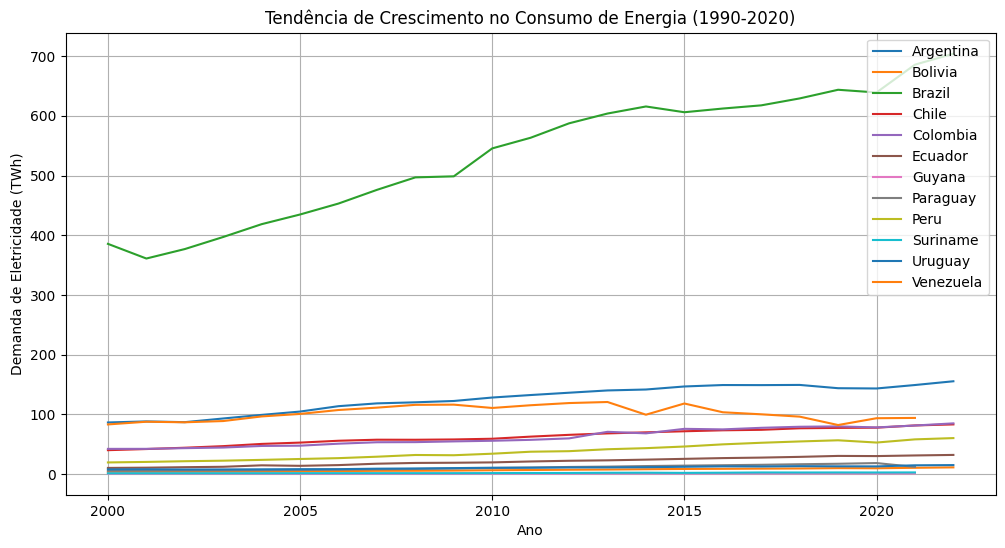

In [9]:
# Tendência de crescimento no consumo de energia
plt.figure(figsize=(12, 6))
for pais in paises_america_do_sul:
    dados_pais = dados_energia_america_sul[dados_energia_america_sul['country'] == pais]
    plt.plot(dados_pais["year"], dados_pais["electricity_demand"], label=pais)
plt.title("Tendência de Crescimento no Consumo de Energia (1990-2020)")
plt.xlabel("Ano")
plt.ylabel("Demanda de Eletricidade (TWh)")
plt.legend()
plt.grid(True)
plt.show()

#### Gráficos e Visualizações
<ol>
    <li>Distribuição de Consumo de Energia entre Países:</li>
        <ul>
            <li>Criar um histograma mostrando a distribuição do consumo total de energia entre os países da América do Sul.</li>
        </ul>
    <li>Análise de Outliers:</li>
        <ul>
            <li>Identificar e visualizar países que possuem valores extremos no consumo de energia (outliers).</li>
        </ul>
</ol>

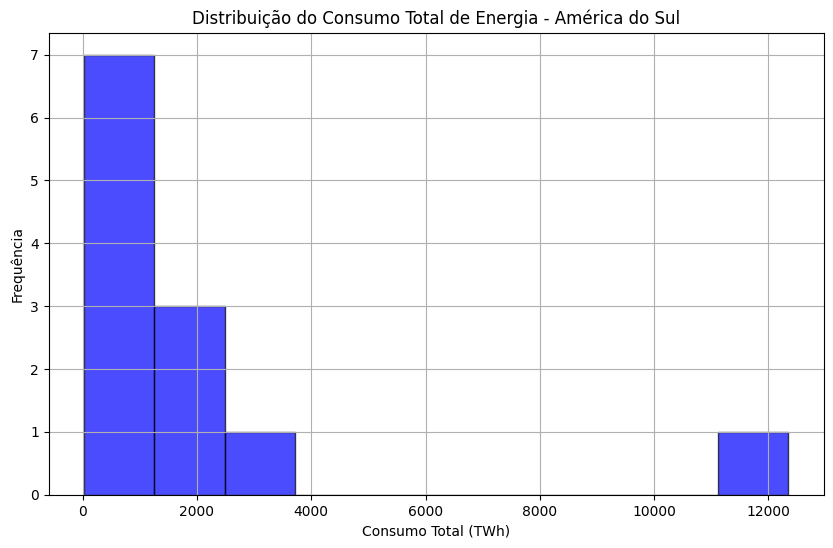

In [10]:
# Histograma da distribuição do consumo total de energia
plt.figure(figsize=(10, 6))
plt.hist(consumo_total_paises, bins=10, alpha=0.7, color="blue", edgecolor="black")
plt.title("Distribuição do Consumo Total de Energia - América do Sul")
plt.xlabel("Consumo Total (TWh)")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

### Análise Final
<ol>
    <li>Resumir as principais descobertas do estudo, como o país com o maior consumo de energia, a proporção de energia renovável usada na América do Sul e as tendências de crescimento.</li>
</ol>

In [11]:
# Identificação de outliers no consumo total de energia
q1 = consumo_total_paises.quantile(0.25)
q3 = consumo_total_paises.quantile(0.75)
iqr = q3 - q1
outliers = consumo_total_paises[(consumo_total_paises < q1 - 1.5 * iqr) | (consumo_total_paises > q3 + 1.5 * iqr)]
print("\nOutliers no consumo total de energia:")
print(outliers)


Outliers no consumo total de energia:
country
Brazil    12351.26
Name: electricity_demand, dtype: float64
